In [1]:
##Imports

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Read into Pandas
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [5]:
## Instead of using get dummies, changing the values themselves for the KOI Disposition

df['koi_disposition'] = df['koi_disposition'].replace(to_replace='FALSE POSITIVE',value=1)
df['koi_disposition'] = df['koi_disposition'].replace(to_replace='CANDIDATE',value=2)
df['koi_disposition'] = df['koi_disposition'].replace(to_replace='CONFIRMED',value=3)
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,3,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,1,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,3,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,3,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,3,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,3,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,3,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,3,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [7]:
## Set features. This will also be used as your x values.

selected_features = df.drop("koi_disposition", axis=1)
selected_features = selected_features.apply(pd.to_numeric)

In [8]:
## Set the target value - Use `koi_disposition` for the y values 

target = df["koi_disposition"]
target = target.apply(pd.to_numeric)

In [9]:
## Train the model 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.33, random_state=42)

In [10]:
## Change the types of the data for the scalar

X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
y_test_scaled

array([[-0.89238328],
       [ 0.30986957],
       [-0.89238328],
       ...,
       [-0.89238328],
       [ 0.30986957],
       [ 1.51212241]])

# Model Selection and Training



In [13]:
# Model selection 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
scores = []
names = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

for name, model in models:
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_train_scaled,y_train))
    names.append(name)

C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
## Which models have the best accuracy? 

list(zip(names,scores))

[('KNN', 0.8891736066623959),
 ('SVC', 0.8898142216527867),
 ('LR', 0.8816997651078369),
 ('DT', 1.0),
 ('GNB', 0.7614776852445014),
 ('RF', 0.9914584667947897),
 ('GB', 0.9406363442237882)]

## KNN Testing

In [15]:
## Testing with KNN 

from sklearn.neighbors import KNeighborsClassifier

k_means = []
testing_scores = []
training_scores = []

for k in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled,y_train)
    training_score = model.score(X_train_scaled,y_train)
    testing_score = model.score(X_test_scaled, y_test)
    training_scores.append(training_score)
    testing_scores.append(testing_score)

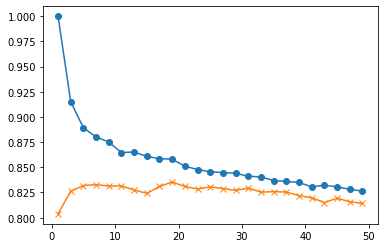

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1,50,2), training_scores, marker='o')
plt.plot(range(1,50,2), testing_scores, marker='x')
plt.show()

# Hyperparameter Tuning with SVC

Use `GridSearchCV` to tune the model's parameters

In [47]:
## Chose SVC for the hyperparameter tuning

from sklearn.svm import SVC 
svc = SVC(kernel='linear',gamma=0.0001,C=50)
svc

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
## Fit the model 

svc.fit(X_train_scaled,y_train)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
## Score the SVC model

svc.score(X_train_scaled,y_train)

0.8945120649156524

In [52]:
## Further predicting 

predictions = svc.predict(X_test_scaled)
actuals = y_test

preds = pd.DataFrame(predictions, y_test)
rename = preds.rename(columns={'predictions':'Predictions',0:'Actuals'})
rename.head()

,Actuals
koi_disposition,
1,1
2,2
1,1
1,1
1,1


In [194]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param_grid)

In [195]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train)

C:\Users\pjayant\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8883194533418749


# Save the Model

In [215]:
import joblib
filename = 'pranav_jayanth.sav'
joblib.dump(svc, filename)

['pranav_jayanth.sav']